In [2]:
print("Hello, JupyterLabwqew!")

Hello, JupyterLabwqew!


    column1   column2
0  0.352980  2.888490
1  0.954253  7.163379
2  0.315487  3.209140
3  0.141598  9.357502
4  0.372328  9.197744


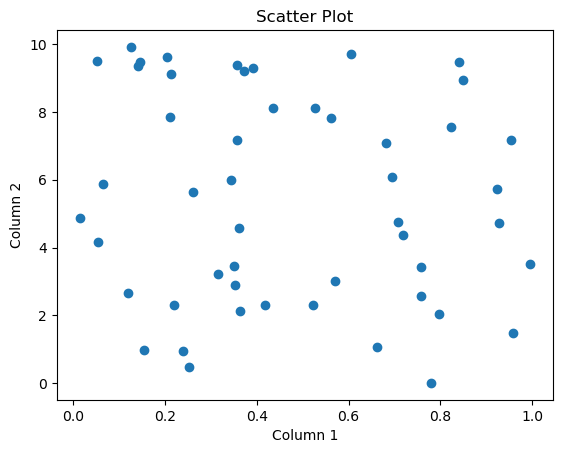

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a sample DataFrame
data = pd.DataFrame({
    "column1": np.random.rand(50),  # 50 random values for column1
    "column2": np.random.rand(50) * 10  # 50 random values (multiplied by 10) for column2
})

# Display the first few rows
print(data.head())

# Create a scatter plot
plt.scatter(data["column1"], data["column2"])
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.title("Scatter Plot")
plt.show()

In [1]:
import pandas as pd


In [4]:
data = pd.read_csv("demo_dataset/demo_dataset.csv")

In [7]:
data.head(10)

,log_id,source_ip,destination_port,protocol,bytes_transferred,threat_level
0,10,10.0.0.100,STRING_PORT,FTP,4096,?
1,12,172.16.254.100,110,POP3,NEGATIVE,1
2,27,172.16.254.200,110,POP3,NON_NUMERIC,1
3,1,192.168.1.100,80,HTTP,1024,0
4,2,192.168.1.81,53,TLS,9765,0
5,3,192.168.1.147,80,SSH,1296,1
6,4,192.168.1.94,22,POP3,7185,0
7,5,192.168.1.55,110,DNS,5088,2
8,6,192.168.1.171,443,HTTPS,5989,2
9,7,192.168.1.196,22,SMTP,3166,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   log_id             100 non-null    int64 
 1   source_ip          99 non-null     object
 2   destination_port   99 non-null     object
 3   protocol           100 non-null    object
 4   bytes_transferred  100 non-null    object
 5   threat_level       100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [9]:
print(data.isnull().sum())

log_id               0
source_ip            1
destination_port     1
protocol             0
bytes_transferred    0
threat_level         0
dtype: int64


In [10]:
import re

def is_valid_ip(ip):
    pattern = re.compile(r'^((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$')
    return bool(pattern.match(ip))

# Check for invalid IP addresses
invalid_ips = data[~data['source_ip'].astype(str).apply(is_valid_ip)]
print(invalid_ips)

    log_id       source_ip destination_port protocol bytes_transferred  \
40      41      10.0.0.300               25     SMTP              4096   
51      52    10.10.10.450      STRING_PORT      FTP              4096   
55      56             NaN               53      DNS              1024   
57      58   192.168.1.475              NaN      UDP              2048   
63      64      MISSING_IP               53      DNS              1024   
65      66   192.168.1.600      UNUSED_PORT      UDP              2048   
71      72      MISSING_IP               53      DNS              1024   
74      75    172.16.1.400               80     HTTP              1024   
82      83    172.16.1.450               80     HTTP              1024   
87      88      MISSING_IP               53      DNS              1024   
88      89    10.10.10.700              443      TLS               512   
92      93      INVALID_IP              110     POP3              4096   
93      94  192.168.1.1050            

In [11]:
def is_valid_port(port):
    try:
        port = int(port)
        return 0 <= port <= 65535
    except ValueError:
        return False

# Check for invalid port numbers
invalid_ports = data[~data['destination_port'].apply(is_valid_port)]
print(invalid_ports)

    log_id       source_ip destination_port protocol bytes_transferred  \
0       10      10.0.0.100      STRING_PORT      FTP              4096   
34      35   192.168.1.200      STRING_PORT      FTP              4096   
51      52    10.10.10.450      STRING_PORT      FTP              4096   
57      58   192.168.1.475              NaN      UDP              2048   
65      66   192.168.1.600      UNUSED_PORT      UDP              2048   
67      68     10.10.10.77      STRING_PORT      FTP              4096   
78      79   172.16.254.77           999999     HTTP              2048   
97      98  192.168.1.1100      UNUSED_PORT      UDP              2048   

   threat_level  
0             ?  
34            ?  
51            ?  
57            1  
65            1  
67            ?  
78            1  
97            0  


In [12]:
valid_protocols = ['TCP', 'TLS', 'SSH', 'POP3', 'DNS', 'HTTPS', 'SMTP', 'FTP', 'UDP', 'HTTP']

# Check for invalid protocol values
invalid_protocols = data[~data['protocol'].isin(valid_protocols)]
print(invalid_protocols)

    log_id      source_ip destination_port protocol bytes_transferred  \
30      31  192.168.1.119              443  UNKNOWN              9513   
80      81  192.168.1.224               25  UNKNOWN              1161   

   threat_level  
30            2  
80            1  


In [13]:
def is_valid_bytes(bytes):
    try:
        bytes = int(bytes)
        return bytes >= 0
    except ValueError:
        return False

# Check for invalid bytes transferred
invalid_bytes = data[~data['bytes_transferred'].apply(is_valid_bytes)]
print(invalid_bytes)

    log_id       source_ip destination_port protocol bytes_transferred  \
1       12  172.16.254.100              110     POP3          NEGATIVE   
2       27  172.16.254.200              110     POP3       NON_NUMERIC   
93      94  192.168.1.1050               53      DNS       NON_NUMERIC   

   threat_level  
1             1  
2             1  
93            0  


In [14]:
def is_valid_threat_level(threat_level):
    try:
        threat_level = int(threat_level)
        return 0 <= threat_level <= 2
    except ValueError:
        return False

# Check for invalid threat levels
invalid_threat_levels = data[~data['threat_level'].apply(is_valid_threat_level)]
print(invalid_threat_levels)

    log_id      source_ip destination_port protocol bytes_transferred  \
0       10     10.0.0.100      STRING_PORT      FTP              4096   
34      35  192.168.1.200      STRING_PORT      FTP              4096   
51      52   10.10.10.450      STRING_PORT      FTP              4096   
67      68    10.10.10.77      STRING_PORT      FTP              4096   

   threat_level  
0             ?  
34            ?  
51            ?  
67            ?  


In [15]:
# the ignore errors covers the fact that there might be some overlap between indexes that match other invalid criteria
data = data.drop(invalid_ips.index, errors='ignore') 
data = data.drop(invalid_ports.index, errors='ignore')
data = data.drop(invalid_protocols.index, errors='ignore')
data = data.drop(invalid_bytes.index, errors='ignore')
data = data.drop(invalid_threat_levels.index, errors='ignore')

print(data.describe(include='all'))

            log_id     source_ip destination_port protocol bytes_transferred  \
count    77.000000            77               77       77                77   
unique         NaN            68                6        9                73   
top            NaN  192.168.1.55               80     HTTP              1024   
freq           NaN             3               22       22                 4   
mean     46.519481           NaN              NaN      NaN               NaN   
std      28.591317           NaN              NaN      NaN               NaN   
min       1.000000           NaN              NaN      NaN               NaN   
25%      22.000000           NaN              NaN      NaN               NaN   
50%      45.000000           NaN              NaN      NaN               NaN   
75%      70.000000           NaN              NaN      NaN               NaN   
max     100.000000           NaN              NaN      NaN               NaN   

       threat_level  
count            

In [17]:
data.head(100)

,log_id,source_ip,destination_port,protocol,bytes_transferred,threat_level
3,1,192.168.1.100,80,HTTP,1024,0
4,2,192.168.1.81,53,TLS,9765,0
5,3,192.168.1.147,80,SSH,1296,1
6,4,192.168.1.94,22,POP3,7185,0
7,5,192.168.1.55,110,DNS,5088,2
...,...,...,...,...,...,...
91,92,192.168.1.219,22,FTP,6949,1
94,95,192.168.1.174,80,HTTP,1649,2
96,97,192.168.1.60,80,HTTPS,4351,1
98,99,192.168.1.16,22,HTTP,9069,0


In [1]:
import pandas as pd
import numpy as np
import re
from ipaddress import ip_address

df =  pd.read_csv("demo_dataset/demo_dataset.csv")

invalid_ips = ['INVALID_IP', 'MISSING_IP']
invalid_ports = ['STRING_PORT', 'UNUSED_PORT']
invalid_bytes = ['NON_NUMERIC', 'NEGATIVE']
invalid_threat = ['?']

df.replace(invalid_ips + invalid_ports + invalid_bytes + invalid_threat, np.nan, inplace=True)

df['destination_port'] = pd.to_numeric(df['destination_port'], errors='coerce')
df['bytes_transferred'] = pd.to_numeric(df['bytes_transferred'], errors='coerce')
df['threat_level'] = pd.to_numeric(df['threat_level'], errors='coerce')

def is_valid_ip(ip):
    pattern = re.compile(r'^((25[0-5]|2[0-4][0-9]|[01]?\d?\d)\.){3}(25[0-5]|2[0-4]\d|[01]?\d?\d)$')
    if pd.isna(ip) or not pattern.match(str(ip)):
        return np.nan
    return ip

df['source_ip'] = df['source_ip'].apply(is_valid_ip)

In [6]:
print(df.head(20))

    log_id       source_ip  destination_port protocol  bytes_transferred  \
0       10      10.0.0.100               NaN      FTP             4096.0   
1       12  172.16.254.100             110.0     POP3                NaN   
2       27  172.16.254.200             110.0     POP3                NaN   
3        1   192.168.1.100              80.0     HTTP             1024.0   
4        2    192.168.1.81              53.0      TLS             9765.0   
5        3   192.168.1.147              80.0      SSH             1296.0   
6        4    192.168.1.94              22.0     POP3             7185.0   
7        5    192.168.1.55             110.0      DNS             5088.0   
8        6   192.168.1.171             443.0    HTTPS             5989.0   
9        7   192.168.1.196              22.0     SMTP             3166.0   
10       8    192.168.1.67             443.0     HTTP             8279.0   
11       9    192.168.1.66              22.0      SSH             6124.0   
12      11  

In [7]:
from sklearn.impute import SimpleImputer

numeric_cols = ['destination_port', 'bytes_transferred', 'threat_level']
categorical_cols = ['protocol']

num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [8]:
print(df.head())

   log_id       source_ip  destination_port protocol  bytes_transferred  \
0      10      10.0.0.100              80.0      FTP             4096.0   
1      12  172.16.254.100             110.0     POP3             4096.0   
2      27  172.16.254.200             110.0     POP3             4096.0   
3       1   192.168.1.100              80.0     HTTP             1024.0   
4       2    192.168.1.81              53.0      TLS             9765.0   

   threat_level  
0           1.0  
1           1.0  
2           1.0  
3           0.0  
4           0.0  


In [9]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = knn_imputer.fit_transform(df[numeric_cols])

In [10]:
print(df.describe(include='all'))

            log_id     source_ip  destination_port protocol  \
count   100.000000            85        100.000000      100   
unique         NaN            75               NaN       10   
top            NaN  192.168.1.55               NaN     HTTP   
freq           NaN             3               NaN       25   
mean     50.500000           NaN      10121.500000      NaN   
std      29.011492           NaN      99987.714971      NaN   
min       1.000000           NaN         22.000000      NaN   
25%      25.750000           NaN         53.000000      NaN   
50%      50.500000           NaN         80.000000      NaN   
75%      75.250000           NaN        110.000000      NaN   
max     100.000000           NaN     999999.000000      NaN   

        bytes_transferred  threat_level  
count           100.00000    100.000000  
unique                NaN           NaN  
top                   NaN           NaN  
freq                  NaN           NaN  
mean           4138.64000      0.

In [11]:
valid_protocols = ['TCP', 'TLS', 'SSH', 'POP3', 'DNS', 'HTTPS', 'SMTP', 'FTP', 'UDP', 'HTTP']
df.loc[~df['protocol'].isin(valid_protocols), 'protocol'] = df['protocol'].mode()[0]

df['source_ip'] = df['source_ip'].fillna('0.0.0.0')
df['destination_port'] = df['destination_port'].clip(lower=0, upper=65535)

In [12]:
print(df.describe(include='all'))

            log_id source_ip  destination_port protocol  bytes_transferred  \
count   100.000000       100        100.000000      100          100.00000   
unique         NaN        76               NaN        9                NaN   
top            NaN   0.0.0.0               NaN     HTTP                NaN   
freq           NaN        15               NaN       27                NaN   
mean     50.500000       NaN        776.860000      NaN         4138.64000   
std      29.011492       NaN       6542.582099      NaN         2526.40978   
min       1.000000       NaN         22.000000      NaN          498.00000   
25%      25.750000       NaN         53.000000      NaN         1693.25000   
50%      50.500000       NaN         80.000000      NaN         4096.00000   
75%      75.250000       NaN        110.000000      NaN         5971.75000   
max     100.000000       NaN      65535.000000      NaN         9765.00000   

        threat_level  
count     100.000000  
unique           

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = encoder.fit_transform(df[['protocol']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['protocol']))
df = pd.concat([df.drop('protocol', axis=1), encoded_df], axis=1)

In [15]:
print(df.head(25))

    log_id       source_ip  destination_port  bytes_transferred  threat_level  \
0       10      10.0.0.100              80.0             4096.0           1.0   
1       12  172.16.254.100             110.0             4096.0           1.0   
2       27  172.16.254.200             110.0             4096.0           1.0   
3        1   192.168.1.100              80.0             1024.0           0.0   
4        2    192.168.1.81              53.0             9765.0           0.0   
5        3   192.168.1.147              80.0             1296.0           1.0   
6        4    192.168.1.94              22.0             7185.0           0.0   
7        5    192.168.1.55             110.0             5088.0           2.0   
8        6   192.168.1.171             443.0             5989.0           2.0   
9        7   192.168.1.196              22.0             3166.0           2.0   
10       8    192.168.1.67             443.0             8279.0           1.0   
11       9    192.168.1.66  

In [16]:
import numpy as np

# Apply logarithmic transformation to a skewed feature to reduce its skewness
df["bytes_transferred"] = np.log1p(df["bytes_transferred"])  # Add 1 to avoid log(0)

In [17]:
print(df["bytes_transferred"])

0     8.318010
1     8.318010
2     8.318010
3     6.932448
4     9.186662
        ...   
95    8.318010
96    8.378391
97    7.625107
98    9.112728
99    7.309881
Name: bytes_transferred, Length: 100, dtype: float64


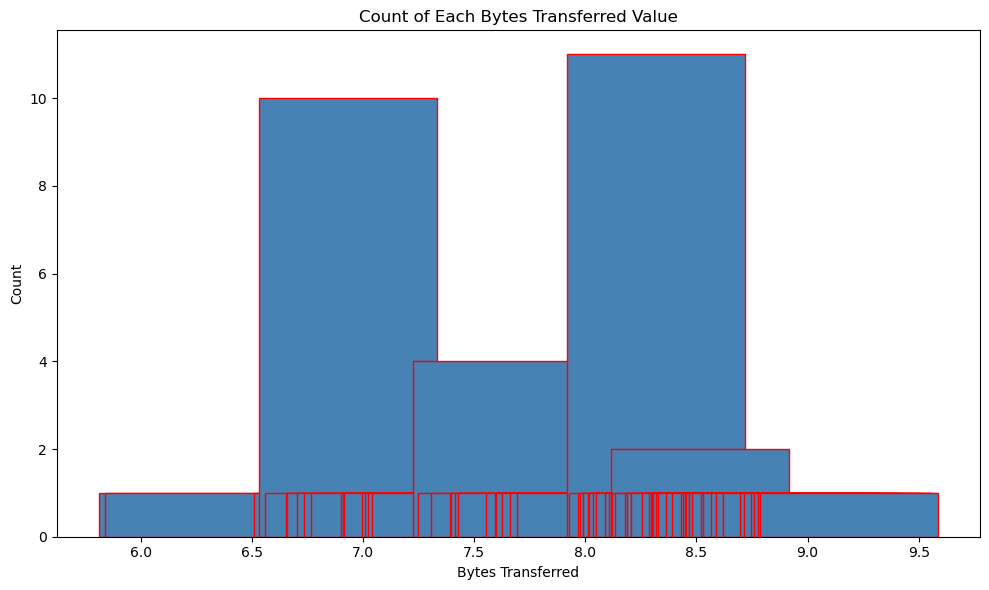

In [20]:
import matplotlib.pyplot as plt

value_counts = df["bytes_transferred"].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(value_counts.index, value_counts.values, color='steelblue',edgecolor='red')
plt.title("Count of Each Bytes Transferred Value")
plt.xlabel("Bytes Transferred")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


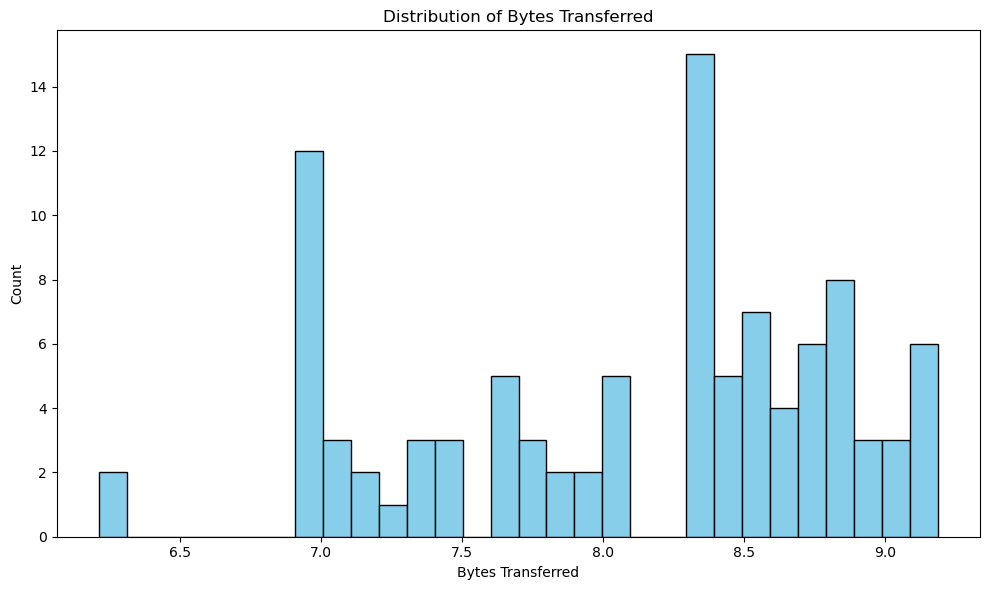

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df["bytes_transferred"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Bytes Transferred")
plt.xlabel("Bytes Transferred")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [1]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop("threat_level", axis=1)
y = df["threat_level"]

# Initial split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

# Second split: from the 80% training portion, allocate 60% for final training and 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1337)

ImportError: DLL load failed while importing _mt19937: An Application Control policy has blocked this file.